<a href="https://colab.research.google.com/github/icarogga/Review_Score/blob/main/review_score.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nome: Ícaro de Paula Figueiredo Coelho

RGA: 201719050503

<br>

Nome: Rodrigo Soeira Silva

RGA: 201719050376

In [ ]:
import pandas as pd
import os
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import sklearn
from sklearn.model_selection import train_test_split
from sklearn import metrics
import numpy as np

In [ ]:
os.chdir('/content/drive/MyDrive/IA')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Importando dados relevantes
df_review = pd.read_csv('/content/drive/MyDrive/IA/olist_order_reviews_dataset.csv')
df_customers = pd.read_csv('/content/drive/MyDrive/IA/olist_customers_dataset.csv')
df_category = pd.read_csv('/content/drive/MyDrive/IA/product_category_name_translation.csv')

In [ ]:
df_geral = df_review.join(df_customers.join(df_category))

In [ ]:
df_geral

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,product_category_name,product_category_name_english
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409.0,franca,SP,beleza_saude,health_beauty
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790.0,sao bernardo do campo,SP,informatica_acessorios,computers_accessories
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151.0,sao paulo,SP,automotivo,auto
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775.0,mogi das cruzes,SP,cama_mesa_banho,bed_bath_table
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056.0,campinas,SP,moveis_decoracao,furniture_decor
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,NaN,NaN,2017-12-09 00:00:00,2017-12-11 20:06:42,NaN,NaN,NaN,NaN,NaN,NaN,NaN
99996,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,NaN,"Excelente mochila, entrega super rápida. Super...",2018-03-22 00:00:00,2018-03-23 09:10:43,NaN,NaN,NaN,NaN,NaN,NaN,NaN
99997,1adeb9d84d72fe4e337617733eb85149,7725825d039fc1f0ceb7635e3f7d9206,4,NaN,NaN,2018-07-01 00:00:00,2018-07-02 12:59:13,NaN,NaN,NaN,NaN,NaN,NaN,NaN
99998,be360f18f5df1e0541061c87021e6d93,f8bd3f2000c28c5342fedeb5e50f2e75,1,NaN,Solicitei a compra de uma capa de retrovisor c...,2017-12-15 00:00:00,2017-12-16 01:29:43,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#Limpando dados descartáveis
df_geral = df_geral.drop('review_id', axis=1)
df_geral = df_geral.drop('order_id', axis=1)
df_geral = df_geral.drop('review_creation_date', axis=1)
df_geral = df_geral.drop('review_answer_timestamp', axis=1)
df_geral = df_geral.drop('customer_id', axis=1)
df_geral = df_geral.drop('customer_unique_id', axis=1)
df_geral = df_geral.drop('customer_zip_code_prefix', axis=1)
df_geral = df_geral.drop('product_category_name_english', axis=1)

In [ ]:
df_geral

,review_score,review_comment_title,review_comment_message,customer_city,customer_state,product_category_name
0,4,NaN,NaN,franca,SP,beleza_saude
1,5,NaN,NaN,sao bernardo do campo,SP,informatica_acessorios
2,5,NaN,NaN,sao paulo,SP,automotivo
3,5,NaN,Recebi bem antes do prazo estipulado.,mogi das cruzes,SP,cama_mesa_banho
4,5,NaN,Parabéns lojas lannister adorei comprar pela I...,campinas,SP,moveis_decoracao
...,...,...,...,...,...,...
99995,5,NaN,NaN,NaN,NaN,NaN
99996,5,NaN,"Excelente mochila, entrega super rápida. Super...",NaN,NaN,NaN
99997,4,NaN,NaN,NaN,NaN,NaN
99998,1,NaN,Solicitei a compra de uma capa de retrovisor c...,NaN,NaN,NaN


In [ ]:
#df_review = df_review.dropna()

In [ ]:
df_review

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53
...,...,...,...,...,...,...,...
99995,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,NaN,NaN,2017-12-09 00:00:00,2017-12-11 20:06:42
99996,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,NaN,"Excelente mochila, entrega super rápida. Super...",2018-03-22 00:00:00,2018-03-23 09:10:43
99997,1adeb9d84d72fe4e337617733eb85149,7725825d039fc1f0ceb7635e3f7d9206,4,NaN,NaN,2018-07-01 00:00:00,2018-07-02 12:59:13
99998,be360f18f5df1e0541061c87021e6d93,f8bd3f2000c28c5342fedeb5e50f2e75,1,NaN,Solicitei a compra de uma capa de retrovisor c...,2017-12-15 00:00:00,2017-12-16 01:29:43


In [ ]:
#Comentários mais relevantes
#df_geral.review_comment_message.dropna()

In [ ]:
#Comentários mais relevantes com pontuações ruins
score = df_geral[["review_score"]]
bad_scores = score.query('review_score<= 3')
bad_scores

,review_score
5,1
14,3
16,2
18,3
19,1
...,...
99987,3
99990,3
99991,3
99998,1


In [ ]:
#Número de comentários com pontuações ruins
len(df_geral.query('review_score <= 3'))

23380

In [ ]:
#Comentários mais relevantes com pontuações boas
good_scores = score.query('review_score >= 4')
good_scores

,review_score
0,4
1,5
2,5
3,5
4,5
...,...
99993,5
99994,5
99995,5
99996,5


In [ ]:
#Número de comentários com pontuações boas
len(df_geral.query('review_score >= 4'))

76620

In [ ]:
#Filtrando linhas sem comentários e com caracteres indesejados para o título e seus comentarios
filter_comments = df_geral['review_comment_message'].notna()
df_geral = df_geral[filter_comments]
df_geral

df_geral['review_comment_message'] = df_geral['review_comment_message'].astype(str)
df_geral['review_comment_message'] = df_geral['review_comment_message'].str.replace(',','')
df_geral['review_comment_message'] = df_geral['review_comment_message'].str.replace('\r','')
df_geral['review_comment_message'] = df_geral['review_comment_message'].str.replace('\n','')

#titulo
df_geral['review_comment_title'] = df_geral['review_comment_title'].str.replace(',','')
df_geral['review_comment_title'] = df_geral['review_comment_title'].str.replace("'",'')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pan

In [ ]:
#Filtrando comentários <= 3
filter_comments = df_geral['review_score'] <= 3
filter_comments
df_geral = df_geral[filter_comments]
df_geral

,review_score,review_comment_title,review_comment_message,customer_city,customer_state,product_category_name
16,2,NaN,GOSTARIA DE SABER O QUE HOUVE SEMPRE RECEBI E ...,rio de janeiro,RJ,ferramentas_jardim
19,1,Não chegou meu produto,Péssimo,pacaja,PA,consoles_games
29,1,NaN,Não gostei ! Comprei gato por lebre,sao paulo,SP,pet_shop
32,1,NaN,Sempre compro pela Internet e a entrega ocorre...,camacari,BA,eletronicos
39,1,NaN,Nada de chegar o meu pedido.,sao jose,SC,livros_tecnicos
...,...,...,...,...,...,...
99975,2,Foto enganosa,Foto muito diferente principalmente a graninha...,NaN,NaN,NaN
99978,2,NaN,Tive um problema na entrega em que o correio c...,NaN,NaN,NaN
99990,3,NaN,O produto não foi enviado com NF não existe ve...,NaN,NaN,NaN
99998,1,NaN,Solicitei a compra de uma capa de retrovisor c...,NaN,NaN,NaN


In [ ]:
#Estudando o maior problema
df_geral['comment_reason'] = ''

product = ["quebrado","errado","errada","funcionamento","brinde","marca","preco","caro","baixa","propaganda","imagem","foto","estragado","defeito","torto"]
delivery = ["entregador","entrega","grosso","rude","estranho","apressado","atendimento","devagar","veio","chegou"]
time = ["prazo","entrega","demorou","tempo","demorou","esperei","rapido","devagar","atrasado","hoje","meses","horas","dias","viagem"]
freight = ["frete","preço","caro","abusivo"]

df_geral['review_comment_message'] = df_geral['review_comment_message'].astype(str)

def check(comment,reason):
    for word in reason:
        if word.upper() in comment.upper():
            return True
    return False

for index, row in df_geral.iterrows():
    if check(row['review_comment_message'], product):
      df_geral.loc[index, 'comment_reason'] = 'Produto insatisfatorio'
    elif check(row['review_comment_message'], delivery):
      df_geral.loc[index, 'comment_reason'] = 'Entrega insatisfatoria'
    elif check(row['review_comment_message'], time):
      df_geral.loc[index, 'comment_reason'] = 'Tempo de entrega insatisfatorio'
    elif check(row['review_comment_message'], freight):
      df_geral.loc[index, 'comment_reason'] = 'Frete insatisfatorio'

In [ ]:
compression_opts = dict(method='zip',
                        archive_name='df_geral.csv')  
df_geral.to_csv('df_geral.zip', index=False,
          compression=compression_opts)

# **Atributos usados**
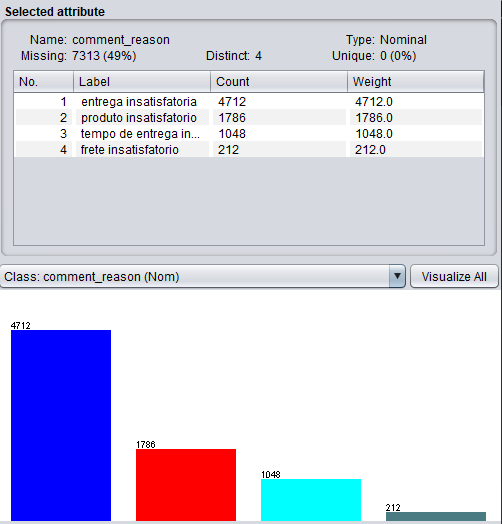

# Dados da árvore

```
# === Run information ===

Scheme:       weka.classifiers.trees.J48 -C 0.25 -M 2
Relation:     df_geral
Instances:    15071
Attributes:   7
              review_score
              review_comment_title
              review_comment_message
              customer_city
              customer_state
              product_category_name
              comment_reason
Test mode:    evaluate on training data

=== Classifier model (full training set) ===

J48 pruned tree
------------------
: entrega insatisfatoria (7758.0/3046.0)

Number of Leaves  : 	1

Size of the tree : 	1


Time taken to build model: 0.34 seconds

=== Evaluation on training set ===

Time taken to test model on training data: 0.43 seconds

=== Summary ===

Correctly Classified Instances        4712               60.7373 %
Incorrectly Classified Instances      3046               39.2627 %
Kappa statistic                          0     
Mean absolute error                      0.2796
Root mean squared error                  0.3739
Relative absolute error                 99.9824 %
Root relative squared error            100      %
Total Number of Instances             7758     
Ignored Class Unknown Instances               7313     

=== Detailed Accuracy By Class ===

                 TP Rate  FP Rate  Precision  Recall   F-Measure  MCC      ROC Area  PRC Area  Class
                 1,000    1,000    0,607      1,000    0,756      ?        0,500     0,313     entrega insatisfatoria
                 0,000    0,000    ?          0,000    ?          ?        0,500     0,119     produto insatisfatorio
                 0,000    0,000    ?          0,000    ?          ?        0,500     0,070     tempo de entrega insatisfatorio
                 0,000    0,000    ?          0,000    ?          ?        0,500     0,014     frete insatisfatorio
Weighted Avg.    0,607    0,607    ?          0,607    ?          ?        0,500     0,227     

=== Confusion Matrix ===

    a    b    c    d   <-- classified as
 4712    0    0    0 |    a = entrega insatisfatoria
 1786    0    0    0 |    b = produto insatisfatorio
 1048    0    0    0 |    c = tempo de entrega insatisfatorio
  212    0    0    0 |    d = frete insatisfatorio


```



# Sugestão ao proprietário
### Como pode ser visto, separando os comentários de acordo com nossos atributos, vê-se que o maior problema dos clientes é na maioria das vezes na entrega de seus produtos. Deve-se contatar seus entregadores e revisar novas transportadoras mais confiáveis, afim de diminuir avaliações precárias.
### Vale salientar que sua empresa encontra-se mais notas boas do que baixas, entretanto ainda numa proporção não muito agradável, então providencie de imediato tais alterações na empresa.